### What is feature scaling ?
=> Feature Scaling technique to stnadardize the independent features present in the data in a fixed range.

### Types of feature scaling: 
1)  Standardization 
2) Normalization 

### 1. Standardization - Intution
Also called as ***Z-score Normalization***





<img src="images/fig1.png" alt="Model Diagram" width="700"/>

Here after standardization , mean must be equal to zero and SD must be equal to 1.
#### In Geometric view..

<img src="images/fig2.png" alt="Model Diagram" width="700"/>

Here plots are centeralized after standardization.

## Example:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Train test split

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop('Purchased', axis=1) # All column except purchased

y = df['Purchased'] 

x_train , x_test , y_train , y_test = train_test_split(x, y ,
test_size = 0.3 , # 30% for testing and 70% for training
random_state = 0) # ensures reproducabilty

x_train.shape , x_test.shape

((280, 2), (120, 2))

### Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the trainset , it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame( x_test_scaled , columns = x_test.columns)

# This step is done because after x_train_scaled = scaler.transform(x_train) we get array format so convert into df

In [12]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
np.round(x_train.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#### Here we can see that after scaled we get ***mean*** = 0 and ***S.D*** = 1

## **Effect of Scaling**

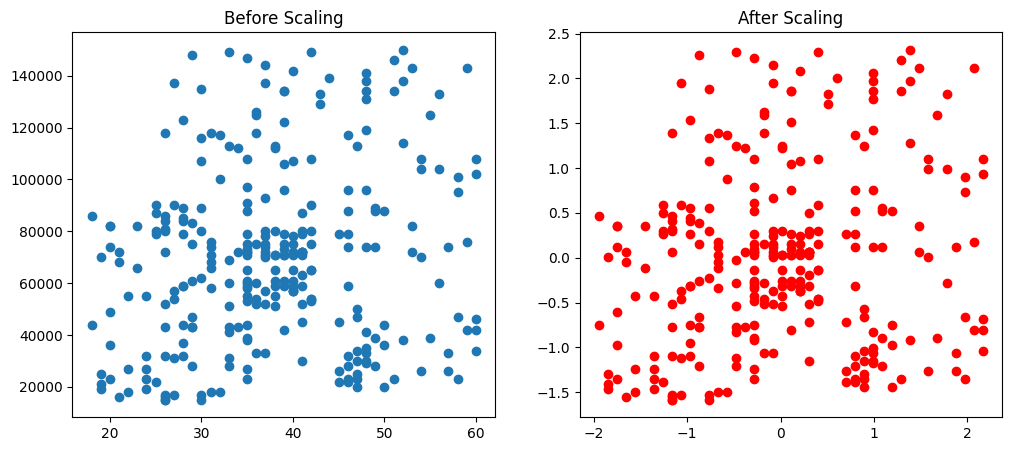

In [15]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12 , 5))

ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_title('After Scaling')
plt.show()


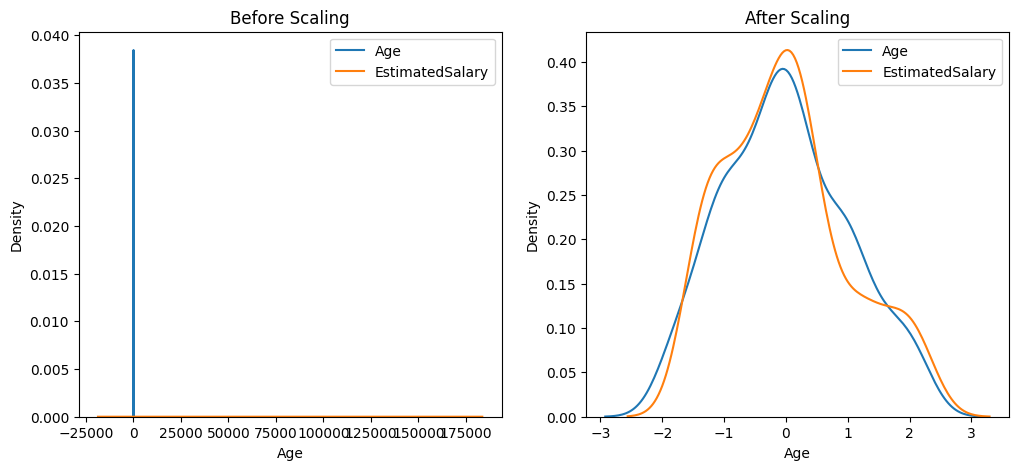

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['Age'], label='Age', ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],label='EstimatedSalary' ,  ax=ax1)
ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled['Age'], label='Age' , ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],label='EstimatedSalary' ,  ax=ax2)
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

#### We can see that after scaleing age and salary pretend to have same curve showing they are dependent . Due to this relation our model give better performance 

### #*Visiting Individually*

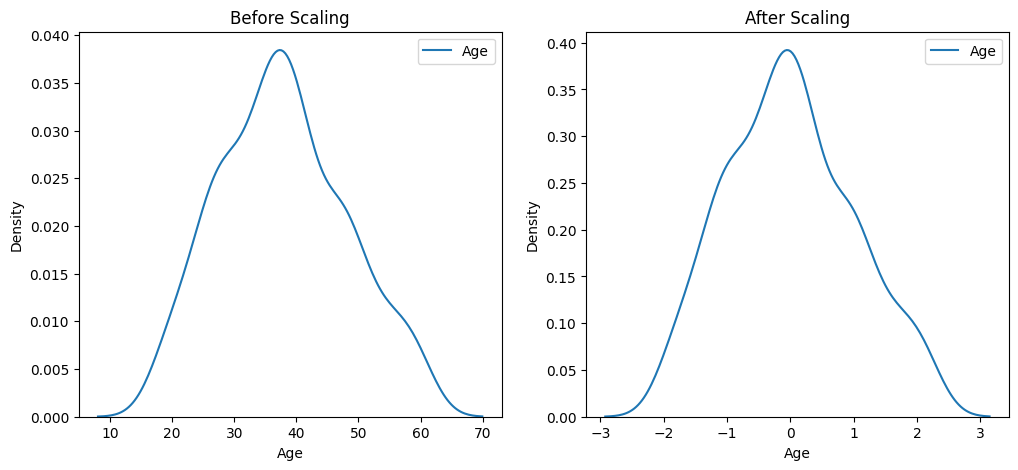

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['Age'], label='Age', ax=ax1)

ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled['Age'], label='Age', ax=ax2)
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

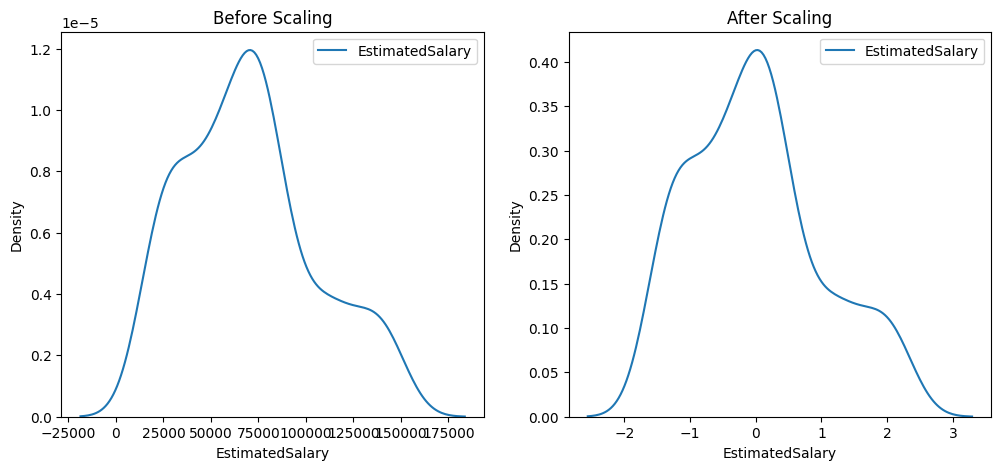

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['EstimatedSalary'], label='EstimatedSalary',  ax=ax1)
ax1.set_title("Before Scaling")
ax1.legend()


sns.kdeplot(x_train_scaled['EstimatedSalary'],
            label='EstimatedSalary',  ax=ax2)
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

We dont see any difference in curve before and after scaling . So we can conclude that ***after scaling only scale , mean and SD are change not shape of curve*** .

### Why is scaling important ?

In [29]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [41]:
lr.fit(x_train , y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("Actual" , accuracy_score(y_test , y_pred))
print("Scaled" , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


## Effect of Outlier

In [47]:

new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 25000, 35000],
    'Purchased': [0, 1, 1]
})

# Use concat instead of append
df = pd.concat([df, new_rows], ignore_index=True)

In [50]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,25000,1


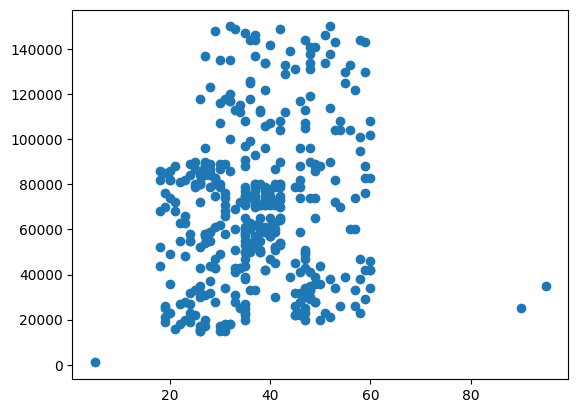

In [51]:
plt.scatter(df['Age'] , df['EstimatedSalary'])

Some part is skipped..
After adding outliers and again do standardization and see in chart then we wont see the effect of standardization in outlier . It means outlier donot get effected even though from standardization . 

### When to use standardization ?

<img src="images/fig3.png" alt="Model Diagram" width="700"/>


Above these algorithm we use standardization .